# Milestone 1 - Independent Project

## Author - Lawrence Huang



For Milestone 1 you should
<li>provide an introduction with a statement of the problem you are addressing and a summary of your conclusions; and</li>
<li>examine several aspects of the dataset by applying multiple chart types and aesthetics. Explain which aspects are important, and why.</li>


## Instructions
<p>
<li>Generate a clear statement problem and provide location for dataset</li>
<li>Provide a clear solution to the problem for a non-technical audience</li>
<li>Visually explore the data to generate insight and include summary statistics</li>

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

### Problem statement: 
<b>Predict the price of a house in King County.</b><br>
Use case: a developer interested in acquiring properties in King County, Washington is interested in what home features (zip code, structure, etc) would yield a high price.
For this part of the project, multiple chart types and aesthetics, as well as summary statistics, were used to visually explore different aspects of the dataset.<br>
### Location for dataset:
https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv

### Introduction/Solution to the problem:
For this part of the project, multiple chart types and aesthetics, as well as summary statistics, were used to visually explore different aspects of the dataset.<br>
Analysis methods include:
<li>historgram, heatmap, box plot, scatter plot, line plot, bar plot, and facet grid</li>
<li>summary statistics (mean, median, standard deviation)</li>

Aspects of the dataset explored include:
<li>variable distribution before and after transformation</li>
<li>the relationship between variables, and the relationship between variables and the target variable (outcome)</li>
<li>new variables (potential new features) to yield additional insight</li>

### Summary of conclusions:
<b>Please see Markdown cells below plots for additional conclusions.</b><p>
<li>The target variable price is positively-skewed with a long right tail; a log transform (price_log) creates a distribution closer to a normal distribution.</li>
<li>Houses with waterfront view, higher condition, higher view, and higher grade generally have higher median price_log.</li>
<li>Houses with more bedrooms, bathrooms, floors, and higher sqft_living and latitude generally have higher median price_log.</li>
<li>grade, sqft_living, sqft_living15, sqft_above, bathrooms have the highest linear correlation with price_log.</li>
<br>
<li>sqft_living15, sqft_lot15 are colinear to other features of similar names (sqft_living, sqft_lot, respectively). Differences between these similar named variables are unclear.</li>
<li>sqft_living = sqft_above + sqft_basement; there are many zeros in sqft_basement, so sqft_above dominates sqft_living.</li>
<li>For bedrooms, there is 1 observation of 33 bedrooms (a potential outlier; greater than mean+2*std)</li>
<br>
<li>Most houses have not been renovated; for houses that have been renovated, mean yr_built = 1940.</li>
<li>Overall, renovated houses have higher median price_log vs. not renovated.</li>
<li>price_log could be better predicted by new feature "yr_built_renovated" (the more recent of yr_built and yr_renovated; taking in account any renovations) than yr_built alone.</li>
<br>
<li>Over ~1 year, there does not appear to be a strong price trend based on date.</li>
<br>
<li>There is a large range of number of transactions (number of observations/rows) and median price by zipcodes.</li>
<li>Highest median price: Medina, WA 98039, Bellevue, WA 98004, Mercer Island, WA 98040.</li>

In [1]:
# Load necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
# Load data
url = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv'
house = pd.read_csv(url)

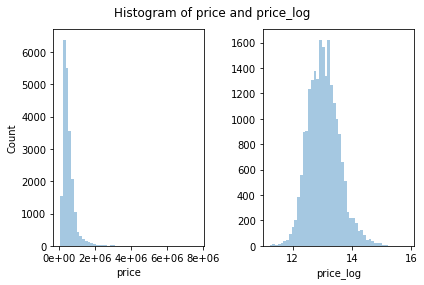

In [3]:
# price is positively-skewed with a long right tail; 
# a log transform creates a distribution closer to a normal distribution.
house['price_log'] = np.log(house['price'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['price'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['price_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of price and price_log')
plt.show()

<b>Observation</b>:<li>Price is positively-skewed with a long right tail; a log transform creates a distribution closer to a normal distribution.</li>

In [4]:
# Determine whether variables are numeric or categorical
print('data type:')
print(house.dtypes)
print('\n')
print('unique levels:')
print(house.nunique())

data type:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price_log        float64
dtype: object


unique levels:
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat              

<b>Observation</b>:
<li>waterfront, view, condition, grade are categorical because they have a small number of discrete numeric values and are qualitative.</li>
<li>zipcode is fundamentally categorical.</li>
<li>id appears to be independent of price (it is a "key", with with almost as many unique values as observations).</li>

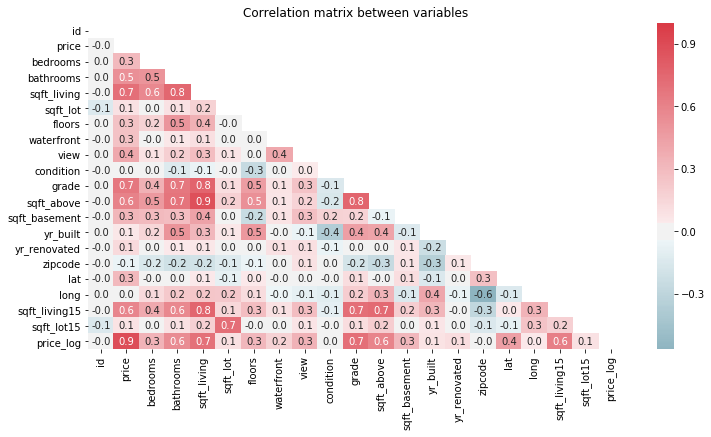

In [5]:
# Examine correlation between variables.
corrmat = house.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True) # diverging colormap
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
sns.heatmap(corrmat, mask=mask, annot=True, cmap=cmap, fmt='.1f', center=0, ax=ax)
ax.set_title('Correlation matrix between variables')
plt.show()

In [6]:
# Find variables with high linear correlation with price log
print('correlation with price_log:\n')
print(corrmat['price_log'].sort_values(ascending=False).drop(labels=['price', 'price_log']))
print('\n#############################\n')


# Examine sqft_basement
print('sqft_basement:\n')
print(house['sqft_basement'].describe())
print('\n#############################\n')

# Test whether sqft_living is sqft_above plus sqft_basement
print('number of observations where sqft_living = sqft_above+sqft_basement: {}'.format(sum(house['sqft_living'] == house['sqft_above']+house['sqft_basement'])))
print('number of total observations: {}'.format(house.shape[0]))

correlation with price_log:

grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601801
bathrooms        0.550802
lat              0.449174
view             0.346522
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
waterfront       0.174586
yr_renovated     0.114498
sqft_lot         0.099622
sqft_lot15       0.091592
yr_built         0.080655
long             0.049942
condition        0.039558
id              -0.003819
zipcode         -0.038306
Name: price_log, dtype: float64

#############################

sqft_basement:

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

#############################

number of observations where sqft_living = sqft_above+sqft_basement: 21613
number of total observations: 21613


<b>Observation</b>:
<li>Highest linear correlation with price_log: grade, sqft_living, sqft_living15, sqft_above, bathrooms.</li>
<li>sqft_living15, sqft_lot15 are colinear to other features of similar names (sqft_living, sqft_lot, respectively). Differences between these similar named variables are unclear.</li>
<li>sqft_living = sqft_above + sqft_basement; there are many zeros in sqft_basement, so sqft_above dominates sqft_living.</li>

In [7]:
# functions to plot price_log vs. categorical and numerical variables
def plot_categorical(col_to_plot, width=4, height=4):
    fig = plt.figure(figsize=(width,height))
    ax = fig.gca()
    sns.boxplot(x=col_to_plot, y='price_log', data=house, ax=ax)
    ax.set_title('Relationship between price_log and {}'.format(col_to_plot))
    fig.tight_layout()
    plt.show()

def plot_numerical(col_to_plot, height=4, aspect=2):
    lm = sns.lmplot(x=col_to_plot, y='price_log', data=house, height=height, aspect=aspect, 
                    truncate=True, scatter_kws={'alpha':0.1,}, line_kws={'lw':2, 'color':'k'})
    lm.set(title=('Relationship between price log and {}'.format(col_to_plot)))
    plt.show()

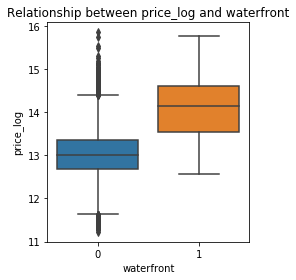

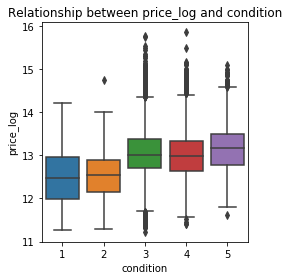

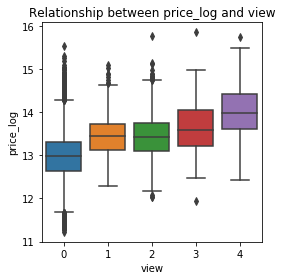

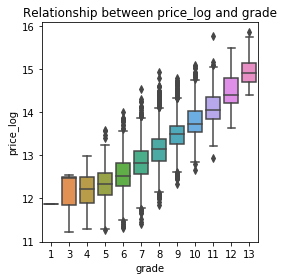

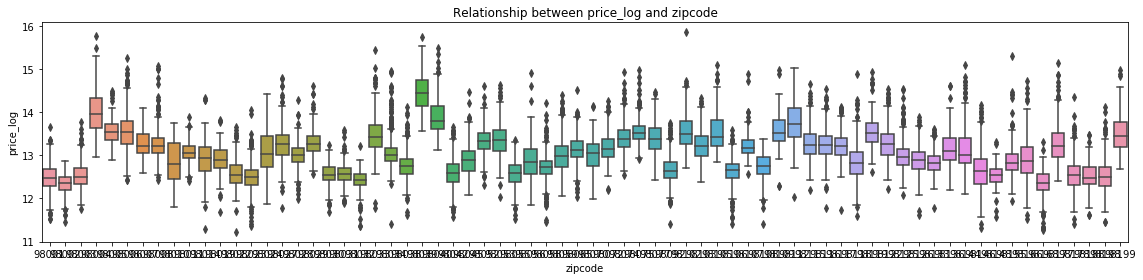

In [8]:
# Examine the relationship between price_log and some categorical variables
plot_categorical('waterfront')
plot_categorical('condition')
plot_categorical('view')
plot_categorical('grade')
plot_categorical('zipcode', 16, 4)

<b>Observation</b>:
<li>Houses with waterfront view, higher condition, higher view, and higher grade generally have higher median price_log</li>
<li>Some zipcodes have higher median price_log than others, to be explored below.</li>

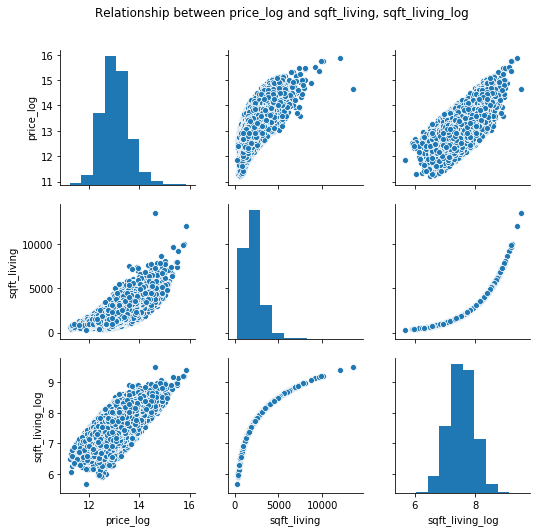

In [9]:
# Relationship between price_log and sqft_living
house['sqft_living_log'] = np.log(house['sqft_living'])
g = sns.pairplot(house[['price_log', 'sqft_living', 'sqft_living_log']])
g.fig.suptitle('Relationship between price_log and sqft_living, sqft_living_log')
plt.subplots_adjust(top=0.9)
plt.show()

<b>Observation</b>:
<li>sqft_living: positively-skewed with a long right tail; a log transform creates a distribution closer to a normal distribution.</li>
<li>sqft_living_log also has a more linear relationship with price_log, compared to before log transform.</li>    


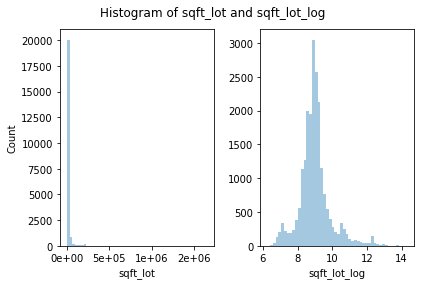

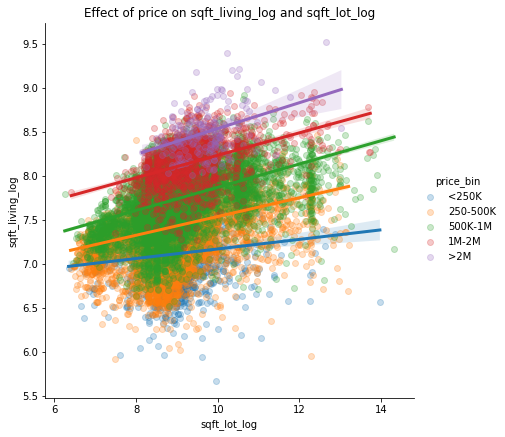

           sqft_living_log  sqft_lot_log  %change_living_log  %change_lot_log
price_bin                                                                    
<250K             7.112407      8.977629            0.000000         0.000000
250-500K          7.417044      8.880635            4.283178        -1.080393
500K-1M           7.743549      9.055902            8.873809         0.871874
1M-2M             8.152767      9.383766           14.627389         4.523879
>2M               8.489317      9.685550           19.359270         7.885394


In [10]:
# Examine the effect of price on the sqft_living and sqft_lot
# bin price to use as a plot aesthetic
house['price_bin'] = pd.cut(house['price'], bins=[0, 250e3, 500e3, 1000e3, 2000e3, np.max(house['price'])], 
       labels=['<250K', '250-500K', '500K-1M', '1M-2M', '>2M'])

# sqft_lot: positively-skewed with a long right tail; 
# a log transform creates a distribution closer to a normal distribution
# log transform also provides consistency with sqft_living_log.

house['sqft_lot_log'] = np.log(house['sqft_lot'])

# plot histograms before and after log transform
fig, axs = plt.subplots(1,2)
sns.distplot(house['sqft_lot'], kde=False, ax=axs[0])
axs[0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
sns.distplot(house['sqft_lot_log'], kde=False, ax=axs[1])
axs[0].set_ylabel('Count')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.suptitle('Histogram of sqft_lot and sqft_lot_log')
plt.show()

# plot sqft_living_log vs. sqft_lot_log with price_bin
g = sns.lmplot(x='sqft_lot_log', y='sqft_living_log', hue='price_bin', data=house,
               height=6, aspect=1,
               truncate=True, scatter_kws={'alpha':0.25,}, line_kws={'lw':3})
g.set(title=('Effect of price on sqft_living_log and sqft_lot_log'))
plt.show()

# mean sqft_living_log and sqft_lot_log for different price bins
bypricebin = house.groupby('price_bin')[['sqft_living_log', 'sqft_lot_log']].mean()
# percent change in sqft_living_log and sqft_lot_log
bypricebin['%change_living_log'] = (bypricebin['sqft_living_log']/bypricebin.loc['<250K','sqft_living_log']-1)*1e2
bypricebin['%change_lot_log'] = (bypricebin['sqft_lot_log']/bypricebin.loc['<250K','sqft_lot_log']-1)*1e2
print(bypricebin)

<b>Observation</b>:
<li>Higher priced houses have larger mean sqft_living_log and mean sqft_lot_log.</li>
<li>Visually, the horizontal separation between price bins (i.e. difference in sqft_living_log) is more pronounced (compared to the difference in sqft_lot_log). This is confirmed from the percent change between price bins.</li>

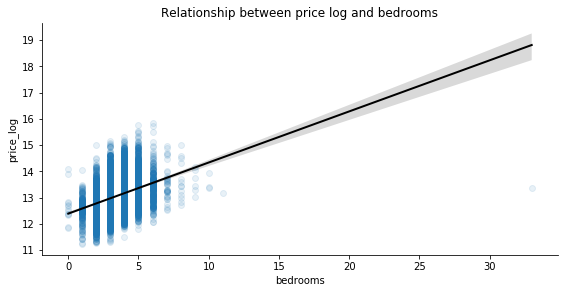

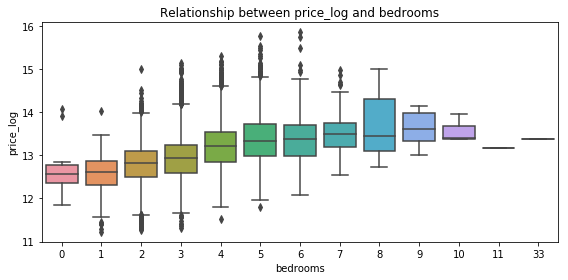

          count       mean
bedrooms                  
0            13  12.683452
1           199  12.563503
2          2760  12.799338
3          9824  12.936713
4          6882  13.222538
5          1601  13.389285
6           272  13.404179
7            38  13.547328
8            13  13.654096
9             6  13.623684
10            3  13.579418
11            1  13.161584
33            1  13.369223

mean+2*std of bedrooms = 5.230965285392136


In [11]:
# Examine the relationship between price_log and bedrooms
plot_numerical('bedrooms')
plot_categorical('bedrooms', 8, 4)
# mean price_log by bedrooms
print(house.groupby('bedrooms')['price_log'].agg(['count', 'mean']))
print('\nmean+2*std of bedrooms =', house['bedrooms'].mean()+2*house['bedrooms'].std())

<b>Observation</b>:
<li>Bedrooms (and bathrooms and in particular floors) could be treated as numerical (because math operations, e.g. addition, are possible), but could also be categorical given the relatively small numbers of discrete values</li>
<li>Most houses have 3 bedrooms.</li>
<li>For bedrooms, there is 1 observation of 33 bedrooms (a potential outlier; greater than mean+2*std)</li>

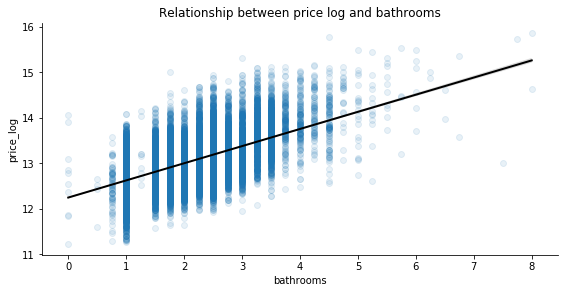

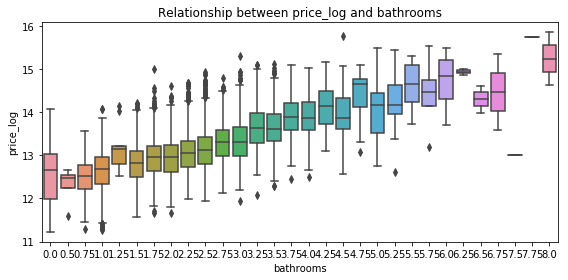

           count       mean
bathrooms                  
0.00          10  12.654618
0.50           4  12.304427
0.75          72  12.488345
1.00        3852  12.663895
1.25           9  13.181757
1.50        1446  12.826194
1.75        3048  12.943894
2.00        1930  12.945215
2.25        2047  13.081219
2.50        5380  13.131441
2.75        1185  13.304738
3.00         753  13.337593
3.25         589  13.642737
3.50         731  13.639175
3.75         155  13.883357
4.00         136  13.915132
4.25          79  14.120288
4.50         100  13.938586
4.75          23  14.401731
5.00          21  14.076461
5.25          13  14.202685
5.50          10  14.617774
5.75           4  14.419566
6.00           6  14.724318
6.25           2  14.942754
6.50           2  14.301258
6.75           2  14.474304
7.50           1  13.017003
7.75           1  15.744856
8.00           2  15.248208


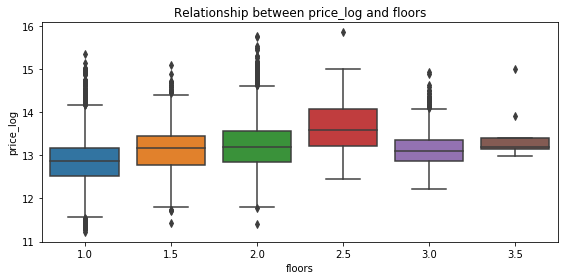

        count       mean
floors                  
1.0     10680  12.875368
1.5      1910  13.111522
2.0      8241  13.235179
2.5       161  13.666089
3.0       613  13.167054
3.5         8  13.471149


In [12]:
# Examine the relationship between price_log and bathrooms, and floors
plot_numerical('bathrooms')
plot_categorical('bathrooms', 8, 4)
# mean price_log by bathrooms
print(house.groupby('bathrooms')['price_log'].agg(['count', 'mean']))

plot_categorical('floors', 8, 4)
# mean price_log by floors
print(house.groupby('floors')['price_log'].agg(['count', 'mean']))

<b>Observation</b>:
<li>Most houses have 2.5 baths. Generally, price_log increases with bathrooms.</li>
<li>Most houses have 1 floor. Generally, price_log increases with floors for 1-2.5 floors.</li>

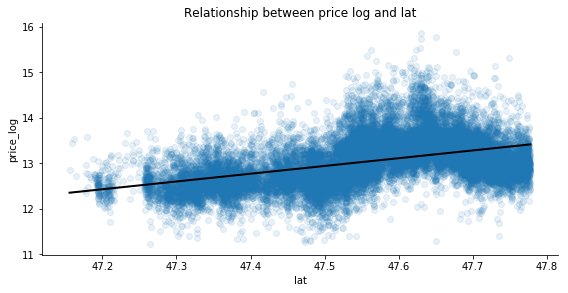

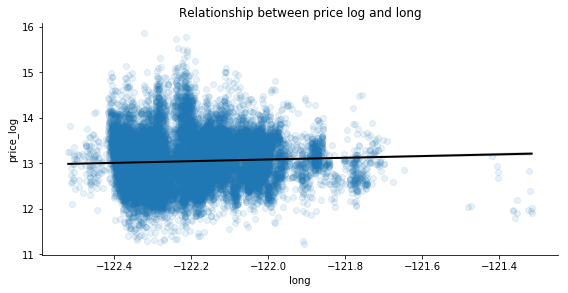

In [13]:
# Examine the relationship between price_log and lat/long
plot_numerical('lat')
plot_numerical('long')

<b>Observation:</b>
<li>Latitute is positively correlated with price_log, from the scatter plot above and the correlation matrix above.</li>

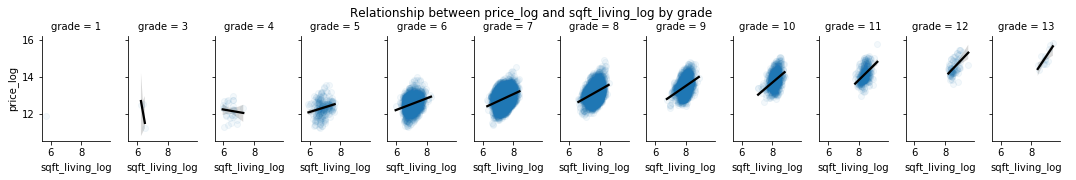

counts by grade: grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: grade, dtype: int64


In [14]:
# Examine multiple variables: price_log vs. sqft_living by grade
g = sns.FacetGrid(house, col='grade', height=2.5, aspect=0.5)
g = g.map(sns.regplot, 'sqft_living_log', 'price_log', truncate=True, scatter_kws={'alpha':0.05}, line_kws={'color':'k'}).add_legend()
g.fig.suptitle('Relationship between price_log and sqft_living_log by grade')
plt.subplots_adjust(top=0.25)
g.fig.tight_layout()
plt.show()

print('counts by grade:', house.groupby('grade')['grade'].count())

<b>Observation</b>:
<li>The positive correlation between price_log and sqft_living_log was observed starting at grade=5 (but grade 1, 3, 4, and 13 have few observations)</li>

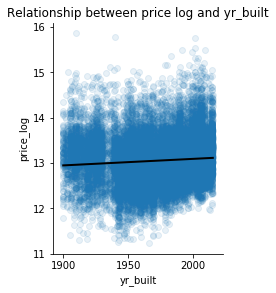

mean yr_built if house has been renovated:  1940.0


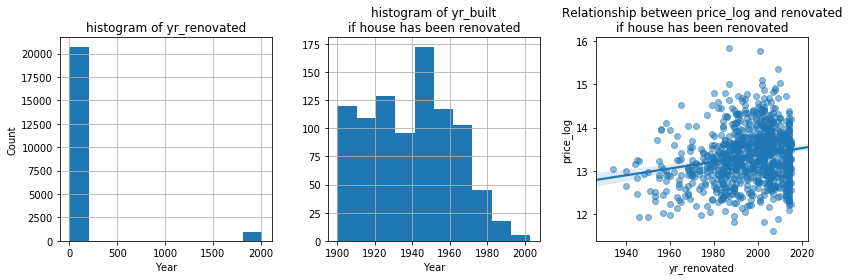

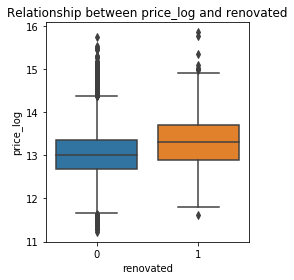

In [15]:
# Examine the relationship between price_log and yr_built
plot_numerical('yr_built', aspect=0.8)

fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize=(12,4))
# most yr_renovated are zero values
house['yr_renovated'].hist(ax=ax)
ax.set_title('histogram of yr_renovated')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
# make new column "renovated", 1 if renovated, 0 if not renovated
conditions = [house['yr_renovated']==0]
choices = [0]
house['renovated'] = np.select(conditions, choices, default=1)
print('mean yr_built if house has been renovated: ', np.round(house[house['renovated']==1]['yr_built'].mean()))
house[house['renovated']==1]['yr_built'].hist(ax=ax1)
ax1.set_title('histogram of yr_built\nif house has been renovated')
ax1.set_xlabel('Year')
g = sns.regplot(x=house[house['renovated']==1]['yr_renovated'], y=house[house['renovated']==1]['price_log'], ax=ax2,
           scatter_kws={'alpha':0.5})
g.set(title='Relationship between price_log and renovated\nif house has been renovated')
fig.tight_layout()
plt.show()
plot_categorical('renovated')

<b>Observation</b>:
<li>1. Weak positive correlation between price_log and yr_built.</li>
<li>2. Most houses have not been renovated; for houses that have been renovated, mean yr_built = 1940. There is also a positive correlation between price_log and yr_renovated for houses that have been renovated.</li>
<li>3. Overall, renovated houses have higher median price_log vs. not renovated.</li>

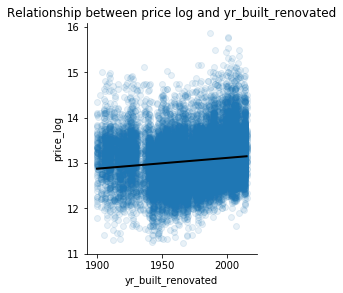

correlation coefficient between yr_built and price_log: 0.08
correlation coefficient between yr_built_renovated and price_log: 0.13


In [16]:
# make new column, the later date of yr_built and yr_renovated
conditions = [house['renovated']==0]
choices = [house['yr_built']]
house['yr_built_renovated'] = np.select(conditions, choices, default=house['yr_renovated'])

plot_numerical('yr_built_renovated', aspect=0.8)

print('correlation coefficient between yr_built and price_log:', np.round(house[['yr_built', 'price_log']].corr().iloc[0,1],2))
print('correlation coefficient between yr_built_renovated and price_log:', np.round(house[['yr_built_renovated', 'price_log']].corr().iloc[0,1],2))

<b>Observation</b>:
<li>yr_built_renovated: yr_renovated for houses that have been renovated, and yr_built for houses that have not been renovated (i.e. the latter of the two).</li>
<li>price_log could be better predicted by yr_built_renovated than yr_built alone.</li>

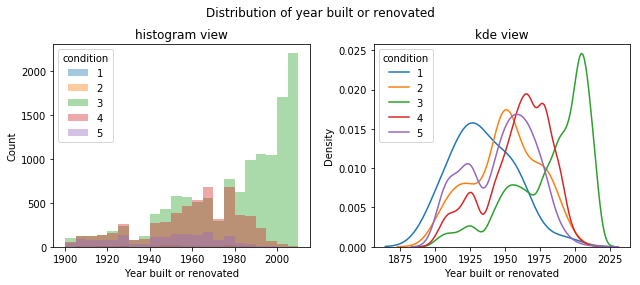

In [17]:
# Examine house condition by year built or renovated (yr_built_renovated)
bins = np.arange(np.min(house['yr_built_renovated']), np.max(house['yr_built_renovated']), 5)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,4))
for xx in np.sort(house['condition'].unique()):
    sns.distplot(house[house['condition']==xx]['yr_built_renovated'], kde=False, bins=bins, ax=ax0, label=xx)
    sns.distplot(house[house['condition']==xx]['yr_built_renovated'], hist=False, bins=bins, ax=ax1, label=xx)
ax0.set_xlabel('Year built or renovated')
ax0.set_ylabel('Count')
ax1.set_xlabel('Year built or renovated')
ax1.set_ylabel('Density')
fig.suptitle('Distribution of year built or renovated')
ax0.legend(title='condition')
ax1.legend(title='condition')
ax0.set_title('histogram view')
ax1.set_title('kde view')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

<b>Observation</b>:
<li>The newest buildings are of medium condition (3), buildings built or renovated before 1980 are of highest condition (5).</li>

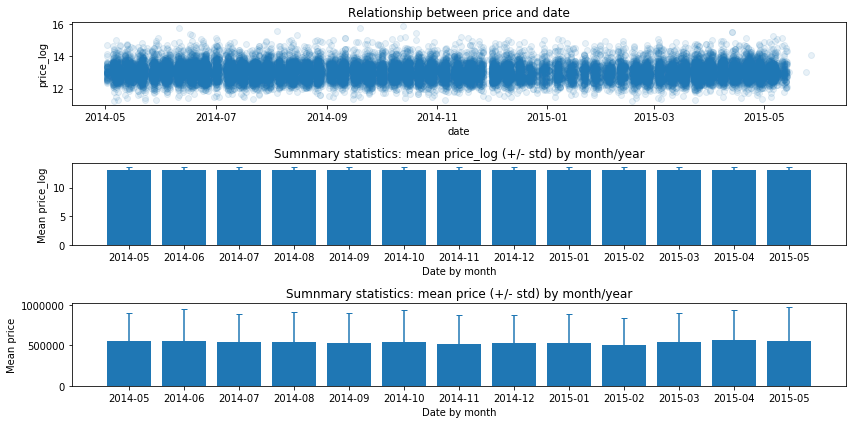

In [18]:
# Examine the relationship between price_log and date
# change date to datetime
house['date'] = pd.to_datetime(house['date'])
# get time period in months to compute summary statistics
house['month-year'] = house['date'].dt.to_period('M')

# workaround for FutureWarning
import pandas.plotting._converter as pandacnv
pandacnv.register()

fig, (ax0, ax1, ax2) = plt.subplots(3,1,figsize=(12,6))
ax0.plot(house['date'], house['price_log'],'o', alpha=0.1)
ax0.set_ylabel('price_log')
ax0.set_xlabel('date')
ax0.set_title('Relationship between price and date')

ax1.bar(x=house.groupby('month-year')['price_log'].mean().index.to_series().astype(str), height=house.groupby('month-year')['price_log'].mean())
ax1.errorbar(x=house.groupby('month-year')['price_log'].mean().index.to_series().astype(str), y=house.groupby('month-year')['price_log'].mean(), yerr=house.groupby('month-year')['price_log'].std(), fmt='none', capsize=3)
ax1.set_title('Sumnmary statistics: mean price_log (+/- std) by month/year')
ax1.set_ylabel('Mean price_log')
ax1.set_xlabel('Date by month')

ax2.bar(x=house.groupby('month-year')['price'].mean().index.to_series().astype(str), height=house.groupby('month-year')['price'].mean())
ax2.errorbar(x=house.groupby('month-year')['price'].mean().index.to_series().astype(str), y=house.groupby('month-year')['price'].mean(), yerr=house.groupby('month-year')['price'].std(), fmt='none', capsize=3)
ax2.set_title('Sumnmary statistics: mean price (+/- std) by month/year')
ax2.set_ylabel('Mean price')
ax2.set_xlabel('Date by month')
fig.tight_layout()
plt.show()

<b>Observation</b>: 
<li>Over ~1 year, there does not appear to be a strong price trend based on date.</li>
<li>Note: price was plotted in addition to price_log for a more intuitive interpretation.</li>

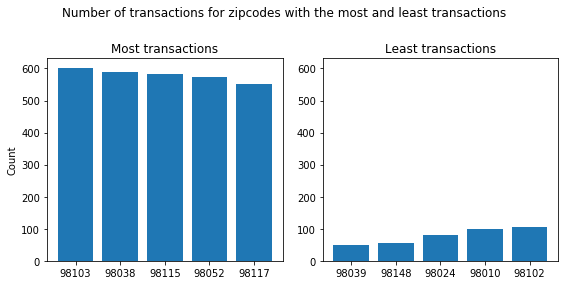

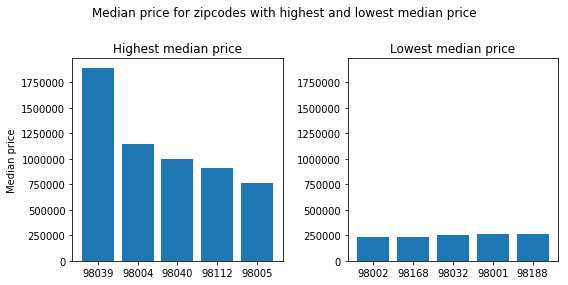

In [19]:
# Examine summary statistics by zipcode
price_by_zip = house.groupby('zipcode')['price'].agg(['count','mean','std','median'])

# Analyze zipcodes with the most/least transactions and the highest/lowest median price

# zipcodes with the most and least transactions
price_by_zip.sort_values(by=['count'], ascending=False).head()
most_transactions = price_by_zip.sort_values(by=['count'], ascending=False).head().index.values
least_transactions = price_by_zip.sort_values(by=['count'], ascending=True).head().index.values
transactions_list = np.append(most_transactions, least_transactions)

# plot # of transactions in zipcodes with the most and least transactions
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].bar(x=most_transactions.astype(str), height=price_by_zip.sort_values(by=['count'], ascending=False).head()['count'].values)
axs[1].bar(x=least_transactions.astype(str), height=price_by_zip.sort_values(by=['count'], ascending=True).head()['count'].values)
axs[0].set_title('Most transactions')
axs[1].set_title('Least transactions')
for ax in axs:
    ax.set_ylim(0, np.max([axs[0].get_ylim()[1], axs[1].get_ylim()[1]]))
axs[0].set_ylabel('Count')
fig.tight_layout()
plt.subplots_adjust(top=0.8)
fig.suptitle('Number of transactions for zipcodes with the most and least transactions')
plt.show()

# zipcodes with the highest and lowest median price
price_by_zip.sort_values(by=['median'], ascending=False).head()
highest_med = price_by_zip.sort_values(by=['median'], ascending=False).head().index.values
lowest_med = price_by_zip.sort_values(by=['median'], ascending=True).head().index.values
med_price_list = np.append(highest_med, lowest_med)

# plot median price in zipcodes with the highest and lowest median price
fig, axs = plt.subplots(1,2, figsize=(8,4))
axs[0].bar(x=highest_med.astype(str), height=price_by_zip.sort_values(by=['median'], ascending=False).head()['median'].values)
axs[1].bar(x=lowest_med.astype(str), height=price_by_zip.sort_values(by=['median'], ascending=True).head()['median'].values)
axs[0].set_title('Highest median price')
axs[1].set_title('Lowest median price')
for ax in axs:
    ax.set_ylim(0, np.max([axs[0].get_ylim()[1], axs[1].get_ylim()[1]]))
axs[0].set_ylabel('Median price')
fig.tight_layout()
plt.subplots_adjust(top=0.8)
fig.suptitle('Median price for zipcodes with highest and lowest median price')
plt.show()

<b>Observation</b>:
<li>This analysis focuses on zipcodes with the most/least transactions (i.e. number of observations/rows) and the highest/lowest median price. There is a large difference in terms of number of transactions and median price between the highest and lowest zipcodes.</li>
<li>Note: plotting price instead of price_log for more intuitive interpretation.</li>
<li>Highest median price found in: Medina, WA 98039, Bellevue, WA 98004, Mercer Island, WA 98040.</li>
<li>Most transactions recorded in 98103.</li>